# Webscrapping using BeautifulSoup#

At this module we will learn on how to do a simple web scrapping method using BeautifulSoup.

<b>Webscrapping</b> is one of a method that we use to collect the data from internet. At this particular module, we will try to scrap the exchange rate of JPY against IDR from https://monexnews.com/kurs-valuta-asing, to do this we will only use a couple default library from python and BeautifulSoup. 

This module is made as easy and simple as possible which can be used for new developer to learn how to webscrapping using Beautiful Soup. But in webscrapping, you will need a bit of knowledge in `html`. You can read it quickly at [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc) documentation. It explain what is html and what does BeautifulSoup exactly do at it landing page. 

# Dependencies

Actually to follow this module you only need to install beautifulsoup4 with `pip install beautifulsoup4` then you're good to go. But first, these are some libabry that is mandatory to be installed: 

- beautifulSoup4
- pandas
- matplotlibs

Here are some packages I use in this modul:

In [1]:
from flask import Flask, render_template
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import dateparser

## What is BeautifulSoup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers
like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library `request`. 

So all this code is basically sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

We're using the `.get()` function here, but Requests allows you to use other functions like `.post()` and `.put()` to send those requests as well. At this case we will going to [here](https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019) to follow what exactly that link goes to. 

In [2]:
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

To visualize what exactly you get from the `request.get`, we can use `.content`. Here is the full content from the url. You also could do slicing for example: *url_get.content[1:500]* if you don't wanna see the full content

In [3]:
url_get.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.com" />\n<meta name="robots" content="follow, index" />\n<meta name="revisit-after" content="7 days" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<meta name="google-site-verificati

As we can see, we get a very unstructured and complex html, which actually contains the codes required to show the webpages on your web browser. To simplify it, we use BeautifulSoup. BeautifulSoup class will result a BeautifulSoup object. It transforms a complex HTML document into a complex tree of Python objects. But you will only ever have to deal with four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [4]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how the result is. As you can see, the content is the same with our `get_url` object but it's tidier. BeautifulSoup also give us a method to make it even more prettier, for tidiness purpouse, we slice to only see first 1045 character. 

In [5]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

Now we already have a tidier html and we should search the lines we needed. We have to find it from the website's html code. From the inspected element, we need to find the line table with class `table`. We can use the find method at our BeautifulSoup object. Let's call the object to see what we get. 

In [6]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:105])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>



As we can see, we find a right lines with information we want. Here are the keywords from HTML's `table` you need to know: 

- `th` stand for table header/header cell
- `tr` stand for table row
- `td` stand for standard cell 

Now we can pull it one by one, but we will use looping to make our job easier. But first we need to create an object that will find all `tr` in `table` to help us in looping.

In [7]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>]

Here what are the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named it `temp` and it's a tuple. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period and the inflation rate. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [8]:
temp = [] #initiating a tuple
    
for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    #use the key to take information here
    #name_of_object = row.find_all(...)[0].text
        
    #get date
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
        
    #get ask
    jual = row.find_all('td')[1].text
    jual = jual.strip() #for removing the excess whitespace
        
    #get bid
    beli = row.find_all('td')[2].text
    beli = beli.strip() #for removing the excess whitespace
        
    temp.append((tanggal,jual,beli)) #append the needed information    
temp 

[('31\xa0Desember\xa02019', '128,62', '127,32'),
 ('30\xa0Desember\xa02019', '128,30', '127,02'),
 ('27\xa0Desember\xa02019', '128,11', '126,83'),
 ('26\xa0Desember\xa02019', '128,27', '126,98'),
 ('23\xa0Desember\xa02019', '128,39', '127,10'),
 ('20\xa0Desember\xa02019', '128,63', '127,34'),
 ('19\xa0Desember\xa02019', '128,24', '126,93'),
 ('18\xa0Desember\xa02019', '128,64', '127,32'),
 ('17\xa0Desember\xa02019', '128,62', '127,33'),
 ('16\xa0Desember\xa02019', '128,67', '127,36'),
 ('13\xa0Desember\xa02019', '128,30', '127,02'),
 ('12\xa0Desember\xa02019', '130,04', '128,71'),
 ('11\xa0Desember\xa02019', '129,65', '128,34'),
 ('10\xa0Desember\xa02019', '129,56', '128,26'),
 ('09\xa0Desember\xa02019', '129,76', '128,44'),
 ('06\xa0Desember\xa02019', '129,78', '128,45'),
 ('05\xa0Desember\xa02019', '130,10', '128,77'),
 ('04\xa0Desember\xa02019', '130,79', '129,45'),
 ('03\xa0Desember\xa02019', '130,15', '128,82'),
 ('02\xa0Desember\xa02019', '129,36', '128,04'),
 ('29\xa0November\xa

That's the result we got, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if you notice the original webpage give us reversed information. To do a further analysis let's reverse our tuple we can use `::-1` to do that. 

In [9]:
temp2 = temp[::-1]
temp2

[('02\xa0Januari\xa02019', '132,89', '131,54'),
 ('03\xa0Januari\xa02019', '135,44', '134,08'),
 ('04\xa0Januari\xa02019', '133,51', '132,17'),
 ('07\xa0Januari\xa02019', '130,86', '129,51'),
 ('08\xa0Januari\xa02019', '129,84', '128,52'),
 ('09\xa0Januari\xa02019', '130,31', '129,00'),
 ('10\xa0Januari\xa02019', '131,22', '129,88'),
 ('11\xa0Januari\xa02019', '130,62', '129,31'),
 ('14\xa0Januari\xa02019', '130,52', '129,19'),
 ('15\xa0Januari\xa02019', '130,56', '129,23'),
 ('16\xa0Januari\xa02019', '131,11', '129,75'),
 ('17\xa0Januari\xa02019', '130,61', '129,27'),
 ('18\xa0Januari\xa02019', '130,37', '129,03'),
 ('21\xa0Januari\xa02019', '130,31', '128,98'),
 ('22\xa0Januari\xa02019', '130,39', '129,07'),
 ('23\xa0Januari\xa02019', '130,05', '128,75'),
 ('24\xa0Januari\xa02019', '129,79', '128,48'),
 ('25\xa0Januari\xa02019', '129,68', '128,37'),
 ('28\xa0Januari\xa02019', '128,97', '127,65'),
 ('29\xa0Januari\xa02019', '129,74', '128,43'),
 ('30\xa0Januari\xa02019', '129,79', '12

Then after we fix our tuple a bit, as usual we will input it to pandas' `DataFrame`.

In [10]:
jpy = pd.DataFrame(temp2, columns = ('tanggal','jual','beli'))

In [11]:
jpy

,tanggal,jual,beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"
...,...,...,...
241,23 Desember 2019,"128,39","127,10"
242,26 Desember 2019,"128,27","126,98"
243,27 Desember 2019,"128,11","126,83"
244,30 Desember 2019,"128,30","127,02"


`jpy` cointains 246 rows, which represents that there are 246 <b>working days</b> in 2019

We should check the data type first to before wrangling the data using `.dtypes`

In [12]:
jpy.dtypes

tanggal    object
jual       object
beli       object
dtype: object

As we can see, from the data, there are 2 points that attract us,

- date type: in Indonesian not English
- foat type: with comma (Indonesian) not point (English)

Since that are not the data type we want, twe need to change the data type into the right type

We need to change this data into the right language that can be read by pandas, doing the replacement for the `,` to `.` and the date type to English type. After the it on the right data type we can do simple visualisation using matplotlib.

<b>Replacing `,` to `.`</b>

In [13]:
jpy['jual'] = jpy['jual'].str.replace(',', '.')
jpy['beli'] = jpy['beli'].str.replace(',', '.')
jpy.head()

,tanggal,jual,beli
0,02 Januari 2019,132.89,131.54
1,03 Januari 2019,135.44,134.08
2,04 Januari 2019,133.51,132.17
3,07 Januari 2019,130.86,129.51
4,08 Januari 2019,129.84,128.52


From the data above, we know that the comma (,) is already replace with point (.)

<b>Replacing Date Type and Float Type</b>

In [14]:
jpy['tanggal'] = jpy['tanggal'].apply(lambda x: dateparser.parse(x))
jpy[['jual','beli']] = jpy[['jual','beli']].astype('float64')
jpy.head(5)

,tanggal,jual,beli
0,2019-01-02,132.89,131.54
1,2019-01-03,135.44,134.08
2,2019-01-04,133.51,132.17
3,2019-01-07,130.86,129.51
4,2019-01-08,129.84,128.52


From the data above, we know that the date type is already converted to `datetime64` for tanggal and `float64` for jual and beli

And now we can re-check the data types to make sure whether we have the right type

In [15]:
jpy.dtypes

tanggal    datetime64[ns]
jual              float64
beli              float64
dtype: object

As you can see, we already get the right type. Next, we can create the DataFrame as we want. In this case, I prefer to create a new column that contain period from the date provided, since I prefer to group the information based on the average value of jual and beli in every month using `.dt.to_period('M')`

Here's the syntax to create the new colum:

In [16]:
jpy['period']= jpy['tanggal'].dt.to_period('M')
jpy.head()

,tanggal,jual,beli,period
0,2019-01-02,132.89,131.54,2019-01
1,2019-01-03,135.44,134.08,2019-01
2,2019-01-04,133.51,132.17,2019-01
3,2019-01-07,130.86,129.51,2019-01
4,2019-01-08,129.84,128.52,2019-01


Now as we get every informations we need, the next step is to group the average number from jual and beli using `groupby()` and `.mean()`

In [17]:
jpy[['period','jual','beli']].groupby(['period']).mean().round(2)

,jual,beli
period,,
2019-01,130.75,129.42
2019-02,127.86,126.57
2019-03,128.52,127.22
2019-04,127.37,126.07
2019-05,131.47,130.14
2019-06,132.40,131.05
2019-07,130.46,129.13
2019-08,134.74,133.37
2019-09,132.01,130.66


As we can see, we get the average number from daily rate in every period for both of jual and beli.

Now, as we get the groupped data based on period and the average from jual and beli, the last thing to do is to visualize the data into charts using `.plot()` to simplify the analysis.

In this project, I chose to show the average from the exchange rate because in my opinion the highest an the lowest number for both components in everymonth didn't show a big gap.

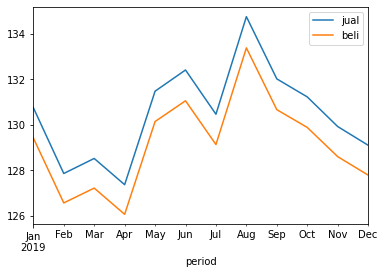

In [18]:
jpy[['period','jual','beli']].groupby(['period']).mean().round(2).plot()

# Conclusion

The chart depicts the exchange rate of JPY against the IDR and vice versa in 2019. It shows fluctuative movement both for the ask (jual) and bid (beli) for the following 4 months before dropped significantly in April which marked the lowest number before rose rapidly in June. There was also a sharp fell in July to around 3 points for both then peaked in August, reaching the highest level for both of indicators and it finally faced downward trend until December.

Overall, the curve showed a relation between ask (jual) and bid (jual) are always following each other.

The lowest point for both components was on April 2019 and the highest point was on August 2019.

The currency exchange rate is one of the most important determinants of a country's relative level of economic health. Exchange rates play a vital role in a country's level of trade, which is critical to most every free market economy in the world. For this reason, exchange rates are among the most watched, analyzed and governmentally manipulated economic measures.
The volatility of exchage rate mostly affected by the purchasing power of income and capital gains derived from any returns. Moreover, the exchange rate influences other income factors such as interest rates, inflation and even capital gains from domestic securities. According to [investopedia](https://www.investopedia.com/trading/factors-influence-exchange-rates/) there are 6 factors that influence the change of rates

The <b>ask price (jual)</b> is the rate at which a dealer will sell the same currency, while the <b>bid price (beli)</b> is what the dealer is willing to pay for a currency. From the buyer side, whenever they want to buy the foreign currency, they should refer to the ask price and whenever they want to sell their foreign currency, they should refer to the buy price.

That's why the ask price is always higher than the bid price. This can be attributed to the expected behavior that a dealer will not sell a foreign currency (asking price) for lower than the price they are willing to pay for it (bidding price) and it is shown in the chart